<a href="https://colab.research.google.com/github/nchebet09/Restaurant-Recommender-System/blob/master/Akeed_9_Neural_Networks_(MLP_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this section, we will be implementing unsupervised learning to create clusters for the customers.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/clustered_train.csv')
train.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans,target
0,TCHWPBT,0.0,1.0,1.0,0.0,-96.4400,-67.20,237.0,118838.0,-0.94340,0.0817,Restaurants,2.0,0.7,15.0,0.0,15.0,0.0,0.0,0.0,11.0,4.6,0.0,"1,5,8,57,30,27,24,16",3.0,TCHWPBT X 0 X 237,5.0,10179.280752,789.0,1.0,1.0
1,TCHWPBT,0.0,1.0,1.0,2.0,-0.1287,-78.56,113.0,118710.0,0.63040,0.5270,Restaurants,2.0,0.0,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.7,462.0,"2,8,91,10",3.0,TCHWPBT X 2 X 113,12.0,8794.323110,790.0,1.0,1.0
2,ZGFSYCZ,0.0,1.0,1.0,0.0,-0.1755,-78.56,274.0,118875.0,0.30540,0.5600,Sweets & Bakes,3.0,0.7,15.0,0.0,45.0,0.0,0.0,0.0,11.0,3.7,180.0,"41,57",3.0,ZGFSYCZ X 0 X 274,12.0,8797.883809,787.0,1.0,1.0
3,ZGFSYCZ,0.0,1.0,1.0,0.0,-0.1755,-78.56,303.0,118905.0,0.00575,0.4822,Restaurants,2.0,0.7,15.0,1.0,15.0,0.0,1.0,1.0,11.0,4.7,1088.0,"60,38,61,16,36",3.0,ZGFSYCZ X 0 X 303,7.0,8789.111559,781.0,1.0,1.0
4,ZGFSYCZ,0.0,1.0,1.0,1.0,0.1912,-78.60,28.0,118624.0,0.48070,0.5527,Restaurants,2.0,0.7,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.4,32.0,5,3.0,ZGFSYCZ X 1 X 28,12.0,8801.258975,786.0,1.0,1.0


In [ ]:
# check dimensions of the data
train.shape

(421663, 31)

In [ ]:
# preview first five rows
train.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans,target
0,TCHWPBT,0.0,1.0,1.0,0.0,-96.4400,-67.20,237.0,118838.0,-0.94340,0.0817,Restaurants,2.0,0.7,15.0,0.0,15.0,0.0,0.0,0.0,11.0,4.6,0.0,"1,5,8,57,30,27,24,16",3.0,TCHWPBT X 0 X 237,5.0,10179.280752,789.0,1.0,1.0
1,TCHWPBT,0.0,1.0,1.0,2.0,-0.1287,-78.56,113.0,118710.0,0.63040,0.5270,Restaurants,2.0,0.0,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.7,462.0,"2,8,91,10",3.0,TCHWPBT X 2 X 113,12.0,8794.323110,790.0,1.0,1.0
2,ZGFSYCZ,0.0,1.0,1.0,0.0,-0.1755,-78.56,274.0,118875.0,0.30540,0.5600,Sweets & Bakes,3.0,0.7,15.0,0.0,45.0,0.0,0.0,0.0,11.0,3.7,180.0,"41,57",3.0,ZGFSYCZ X 0 X 274,12.0,8797.883809,787.0,1.0,1.0
3,ZGFSYCZ,0.0,1.0,1.0,0.0,-0.1755,-78.56,303.0,118905.0,0.00575,0.4822,Restaurants,2.0,0.7,15.0,1.0,15.0,0.0,1.0,1.0,11.0,4.7,1088.0,"60,38,61,16,36",3.0,ZGFSYCZ X 0 X 303,7.0,8789.111559,781.0,1.0,1.0
4,ZGFSYCZ,0.0,1.0,1.0,1.0,0.1912,-78.60,28.0,118624.0,0.48070,0.5527,Restaurants,2.0,0.7,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.4,32.0,5,3.0,ZGFSYCZ X 1 X 28,12.0,8801.258975,786.0,1.0,1.0


In [ ]:
# check lat five rows
train.tail()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans,target
421658,YG44SEU,0.0,1.0,1.0,0.0,0.42970,-78.600,401.0,119004.0,0.001904,0.54740,Sweets & Bakes,3.0,0.7,15.0,1.0,13.0,0.0,1.0,1.0,11.0,4.5,1256.0,"64,36",3.0,YG44SEU X 0 X 401,13.0,8800.834226,495.0,4.0,0.0
421659,H8KV8OC,2.0,1.0,1.0,0.0,19.22000,3.025,537.0,119141.0,-0.524000,0.05264,Restaurants,2.0,0.0,15.0,1.0,20.0,0.0,1.0,1.0,11.0,4.4,8.0,"1,5,8,91,30,29,48",3.0,H8KV8OC X 0 X 537,15.0,2219.268361,67.0,2.0,0.0
421660,GBHNW7S,0.0,1.0,1.0,0.0,0.08405,-78.600,81.0,118678.0,-0.712000,0.06335,Restaurants,2.0,0.0,15.0,1.0,15.0,0.0,1.0,1.0,11.0,3.8,0.0,"2,4,8,53,13,24,16",3.0,GBHNW7S X 0 X 81,10.0,8747.195957,476.0,1.0,0.0
421661,LQ4V2YJ,0.0,1.0,1.0,0.0,-0.26860,-78.560,225.0,118824.0,-0.815400,0.09150,Restaurants,2.0,0.0,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.2,346.0,"4,91,38,30,79,52,45",3.0,LQ4V2YJ X 0 X 225,17.0,8745.369875,534.0,1.0,0.0
421662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop last row
train = train.iloc[:-1, :]
train.tail()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans,target
421657,ECCOYNW,0.0,1.0,1.0,1.0,-0.005302,0.6045,81.0,118678.0,-0.712000,0.06335,Restaurants,2.0,0.0,15.0,1.0,15.0,0.0,1.0,1.0,11.0,3.8,0.0,"2,4,8,53,13,24,16",3.0,ECCOYNW X 1 X 81,10.0,98.973004,524.0,2.0,0.0
421658,YG44SEU,0.0,1.0,1.0,0.0,0.429700,-78.6000,401.0,119004.0,0.001904,0.54740,Sweets & Bakes,3.0,0.7,15.0,1.0,13.0,0.0,1.0,1.0,11.0,4.5,1256.0,"64,36",3.0,YG44SEU X 0 X 401,13.0,8800.834226,495.0,4.0,0.0
421659,H8KV8OC,2.0,1.0,1.0,0.0,19.220000,3.0250,537.0,119141.0,-0.524000,0.05264,Restaurants,2.0,0.0,15.0,1.0,20.0,0.0,1.0,1.0,11.0,4.4,8.0,"1,5,8,91,30,29,48",3.0,H8KV8OC X 0 X 537,15.0,2219.268361,67.0,2.0,0.0
421660,GBHNW7S,0.0,1.0,1.0,0.0,0.084050,-78.6000,81.0,118678.0,-0.712000,0.06335,Restaurants,2.0,0.0,15.0,1.0,15.0,0.0,1.0,1.0,11.0,3.8,0.0,"2,4,8,53,13,24,16",3.0,GBHNW7S X 0 X 81,10.0,8747.195957,476.0,1.0,0.0
421661,LQ4V2YJ,0.0,1.0,1.0,0.0,-0.268600,-78.5600,225.0,118824.0,-0.815400,0.09150,Restaurants,2.0,0.0,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.2,346.0,"4,91,38,30,79,52,45",3.0,LQ4V2YJ X 0 X 225,17.0,8745.369875,534.0,1.0,0.0


In [ ]:
# drop akeed_customer_id and vendor category
train.drop(train.columns[[0,11]], axis=1, inplace=True)
train.shape

(421662, 29)

In [ ]:
# train.reset_index(drop=True)
# train.head()

### Pearson's Correlation

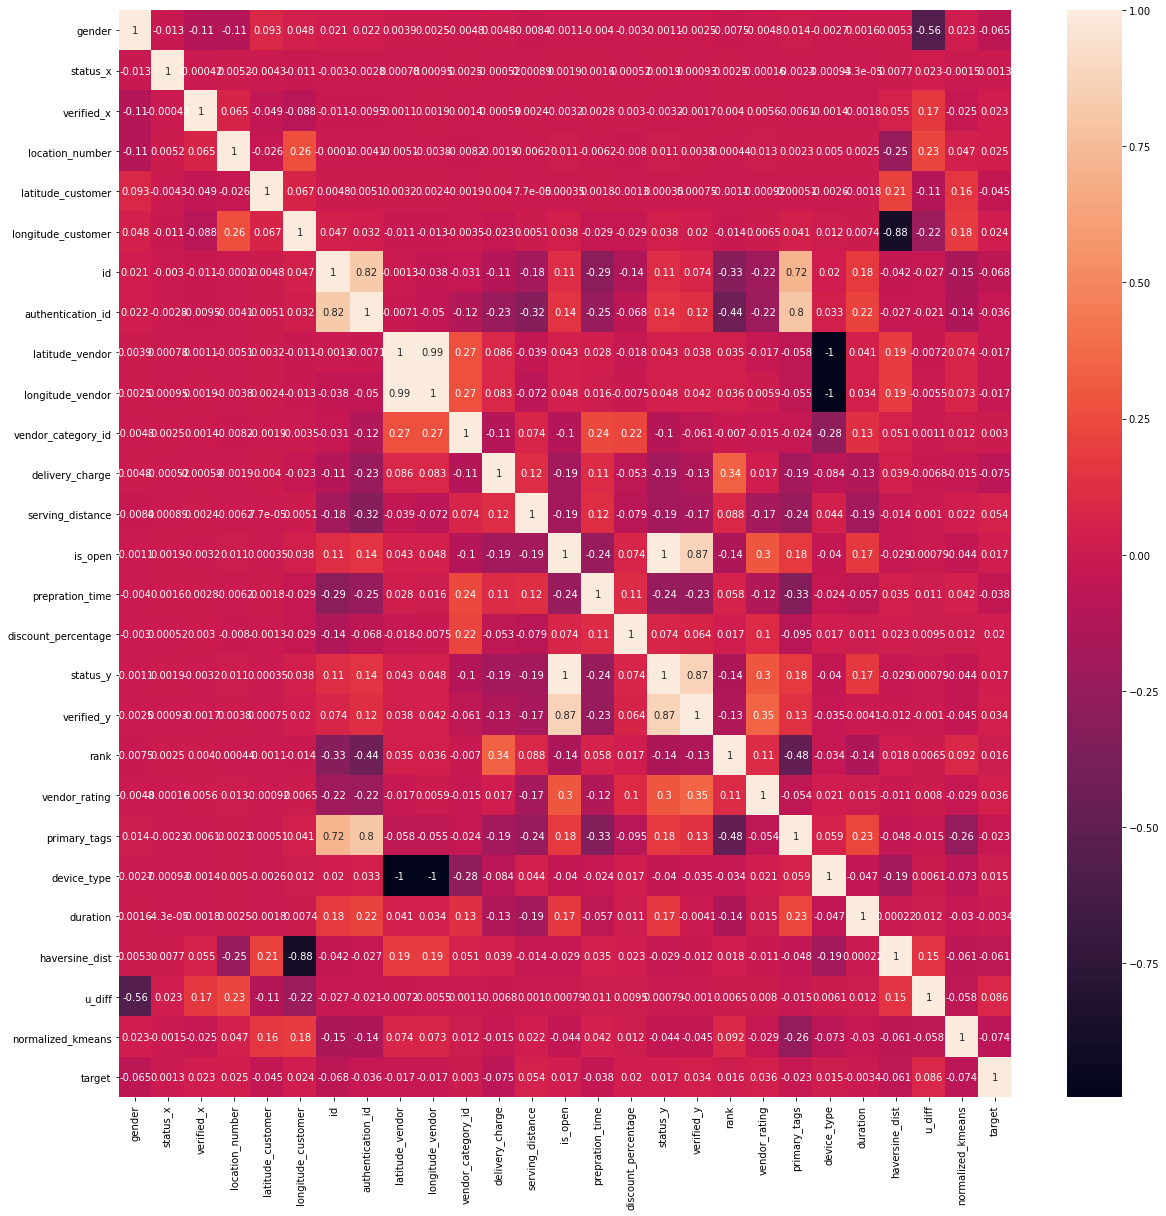

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(train.drop(['vendor_tag', 'CID X LOC_NUM X VENDOR'], 1).corr(), annot=True)
plt.show()

In [ ]:
# drop features that are correlated to each other
train = train.drop(['device_type', 'is_open', 'status_y', 'authentication_id', 'longitude_customer'], 1)

### Predictive power score


In [ ]:
pip install -U ppscore

In [ ]:
# # check the predictive power of each feature on the target
# import ppscore as pps

# pps.predictors(train, 'target')

## Modelling

In [ ]:
# shuffle the train data set
train = train.sample(frac = 1, random_state=27)
train = train.reset_index(drop=True)
train.head()

,gender,status_x,verified_x,location_number,latitude_customer,id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,prepration_time,discount_percentage,verified_y,rank,vendor_rating,primary_tags,vendor_tag,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans,target
0,2.0,1.0,1.0,0.0,-1.1140,304.0,-1.2680,0.02837,2.0,0.7,10.0,15.0,0.0,1.0,11.0,4.0,32.0,"1,4,5,30,16",YI6W074 X 0 X 304,13.0,8723.063107,183.0,1.0,0.0
1,0.0,1.0,1.0,0.0,-0.4470,907.0,13.3360,-1.44900,2.0,0.7,12.0,20.0,0.0,1.0,11.0,4.3,24.0,"46,52,16",4V3NA89 X 0 X 907,15.0,8625.434438,376.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.1356,250.0,-0.5117,0.75830,2.0,0.7,5.0,15.0,0.0,1.0,11.0,4.5,47.0,"1,4,45,24,16",9ZSXSQS X 0 X 250,14.0,74.598418,588.0,2.0,0.0
3,0.0,1.0,1.0,0.0,-0.0342,459.0,-0.9960,-0.06230,2.0,0.0,10.0,15.0,0.0,1.0,11.0,4.2,8.0,"5,91,32,52",8CMME4G X 0 X 459,12.0,8728.686703,452.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.3390,161.0,-0.8843,-0.12760,2.0,0.7,10.0,17.0,0.0,0.0,11.0,4.2,0.0,"5,8,63,15",DNU1TTG X 0 X 161,13.0,8745.270396,140.0,1.0,1.0


In [ ]:
# assign target and variables
X = train.drop(['target','CID X LOC_NUM X VENDOR', 'vendor_tag'], axis=1)
y = train.target

## Neural Networks

In [ ]:
# split the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Scale the targets
scaler = StandardScaler()

# Fit the training data
scaler.fit(X_train)

# Transform the features
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# Create instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=400)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_val)

# Evaluate the model
cm = confusion_matrix(y_val, y_pred)
print(cm)
print('\n')
print(classification_report(y_val, y_pred))

[[66146  2467]
 [11306  4414]]


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91     68613
         1.0       0.64      0.28      0.39     15720

    accuracy                           0.84     84333
   macro avg       0.75      0.62      0.65     84333
weighted avg       0.81      0.84      0.81     84333



## Hyperparameter tuning

In [ ]:
mlp_gs = MLPClassifier(hidden_layer_sizes=(10,10,10,10), max_iter=350)
parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y) # X is train samples and y is the corresponding labels

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
# Scale the targets
scaler = StandardScaler()

# Fit the training data
scaler.fit(X_train)

# Transform the features
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# Create instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=350, solver='adam', alpha=0.0001, learning_rate='constant')
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_val)

# Evaluate the model
cm = confusion_matrix(y_val, y_pred)
print(cm)
print('\n')
print(classification_report(y_val, y_pred))

## Predict Test Data

In [ ]:
# load test data
test = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/clustered_test.csv')
test.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans
0,ICE2DJP,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",3,ICE2DJP X 0 X 4,12,10210.781498,789,1
1,ICE2DJP,0,1,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",3,ICE2DJP X 0 X 13,14,10223.800918,788,1
2,ICE2DJP,0,1,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",3,ICE2DJP X 0 X 20,14,10232.068678,789,1
3,ICE2DJP,0,1,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",3,ICE2DJP X 0 X 23,12,10211.117900,784,1
4,ICE2DJP,0,1,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,3,ICE2DJP X 0 X 28,12,10331.347778,787,1


In [ ]:
# assign target and variables
X_test = test.loc[:,['gender', 'status_x', 'verified_x', 'location_number',
       'latitude_customer', 'id', 'latitude_vendor', 'longitude_vendor',
       'vendor_category_id', 'delivery_charge', 'serving_distance',
       'prepration_time', 'discount_percentage', 'verified_y', 'rank',
       'vendor_rating', 'primary_tags', 'duration', 'haversine_dist', 'u_diff', 'normalized_kmeans']]

In [ ]:
# assign target and variables
# X_test = test[X.columns]
X_test.shape

(1631700, 21)

In [ ]:
# scale the data
X_test = scaler.transform(X_test)

In [ ]:
# make predictions
predictions = mlp.predict(X_test)
pred_prob = mlp.predict_proba(X_test)

In [ ]:
len(predictions)

1631700

In [ ]:
#probability predictions of target classes
prob_class_1 = mlp.predict_proba(X_test)[:, 1] 
prob_class_0 = mlp.predict_proba(X_test)[:, 0] 

In [ ]:
# create submission file
test['predictions'] = predictions
sub1 = test.loc[:,['CID X LOC_NUM X VENDOR', 'predictions']]
sub1['prob_class1'] = prob_class_1
sub1['prob_class0'] = prob_class_0
sub1.head()

,CID X LOC_NUM X VENDOR,predictions,prob_class1,prob_class0
0,ICE2DJP X 0 X 4,0.0,0.023588,0.976412
1,ICE2DJP X 0 X 13,0.0,0.031956,0.968044
2,ICE2DJP X 0 X 20,0.0,0.037950,0.962050
3,ICE2DJP X 0 X 23,0.0,0.027763,0.972237
4,ICE2DJP X 0 X 28,0.0,0.017647,0.982353


In [ ]:
# load sample submission
sample_submission = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/SampleSubmission.csv')
sample_submission.head()

,CID X LOC_NUM X VENDOR,target
0,Z59FTQD X 0 X 243,0
1,0JP29SK X 0 X 243,0
2,0JP29SK X 1 X 243,0
3,0JP29SK X 2 X 243,0
4,0JP29SK X 3 X 243,0


In [ ]:
# merge predictions with sample submission to get complete data
ss1 = sub1[['CID X LOC_NUM X VENDOR', 'predictions']]
ss1 = pd.merge(ss1, sample_submission, how='outer', on=['CID X LOC_NUM X VENDOR'])

ss1.shape

(1672000, 3)

In [ ]:
# drop target column
ss1 = ss1.drop('target', 1)
ss1.head()

,CID X LOC_NUM X VENDOR,predictions
0,ICE2DJP X 0 X 4,0.0
1,ICE2DJP X 0 X 13,0.0
2,ICE2DJP X 0 X 20,0.0
3,ICE2DJP X 0 X 23,0.0
4,ICE2DJP X 0 X 28,0.0


In [ ]:
ss1.predictions.value_counts()

0.0    1568122
1.0      63578
Name: predictions, dtype: int64

In [ ]:
# check for null values
ss1.predictions.isna().sum()

40300

In [ ]:
ss1.predictions.fillna('0', inplace=True)
ss1.predictions.isna().sum()

0

In [ ]:
# save submission file in drive
ss1.to_csv('/content/drive/My Drive/Akeed Recommendation Files/submission1.csv', index =False)

This submission had a score of 0.1537 ranked 90th on the leaderboard. To improve performance will break down the data into clusters which we will then use to build different models. For clusters 3 and 4 where we observed that no orders were made, we will predict no orders will be made from these clusters on the test set.

In [ ]:
# Split data set by clusters
train_cluster0 = train[train.normalized_kmeans == 0].reset_index(drop=True)
train_cluster1 = train[train.normalized_kmeans == 1].reset_index(drop=True)
train_cluster2 = train[train.normalized_kmeans == 2].reset_index(drop=True)
train_cluster3 = train[train.normalized_kmeans == 3].reset_index(drop=True)
train_cluster4 = train[train.normalized_kmeans == 4].reset_index(drop=True)

In [ ]:
# Split data set by clusters
test_cluster0 = test[test.normalized_kmeans == 0].reset_index(drop=True)
test_cluster1 = test[test.normalized_kmeans == 1].reset_index(drop=True)
test_cluster2 = test[test.normalized_kmeans == 2].reset_index(drop=True)
test_cluster3 = test[test.normalized_kmeans == 3].reset_index(drop=True)
test_cluster4 = test[test.normalized_kmeans == 4].reset_index(drop=True)

In [ ]:
test_cluster0.shape

(192294, 31)

In [ ]:
test.normalized_kmeans.value_counts()

2    865348
1    462055
0    192294
4     68854
3     43149
Name: normalized_kmeans, dtype: int64

### Cluster 0

In [ ]:
# split cluster 0 into train and test
X0 = train_cluster0.drop(['normalized_kmeans', 'CID X LOC_NUM X VENDOR', 'vendor_tag', 'target'], 1)
y0 = train_cluster0.target

# split the data set into train and test
X0_train, X0_val, y0_train, y0_val = train_test_split(X0, y0, test_size=0.2, random_state=23)

# Scale the targets
scaler = StandardScaler()

# Fit the training data
scaler.fit(X0_train)

# Transform the features
X0_train = scaler.transform(X0_train)
X0_val = scaler.transform(X0_val)

# Create instance of MLPClassifier
mlp0 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=500)
mlp0.fit(X0_train, y0_train)

# Make predictions
y0_pred = mlp0.predict(X0_val)

# Evaluate the model
cm = confusion_matrix(y0_val, y0_pred)
print(cm)
print('\n')
print(classification_report(y0_val, y0_pred))

[[7514  594]
 [ 858 1292]]


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      8108
         1.0       0.69      0.60      0.64      2150

    accuracy                           0.86     10258
   macro avg       0.79      0.76      0.78     10258
weighted avg       0.85      0.86      0.85     10258



In [ ]:
# assign target and variables
X0_test = test_cluster0.loc[:,['gender', 'status_x', 'verified_x', 'location_number',
       'latitude_customer', 'id', 'latitude_vendor', 'longitude_vendor',
       'vendor_category_id', 'delivery_charge', 'serving_distance',
       'prepration_time', 'discount_percentage', 'verified_y', 'rank',
       'vendor_rating', 'primary_tags', 'duration', 'haversine_dist', 'u_diff']]

# scale the data
X0_test = scaler.transform(X0_test)
# make predictons
clust0_preds = mlp0.predict(X0_test)

# create submission file
test_cluster0['predictions'] = clust0_preds
sub_cluster0 = test_cluster0.loc[:,['CID X LOC_NUM X VENDOR', 'predictions']]
sub_cluster0.head()

,CID X LOC_NUM X VENDOR,predictions
0,FWNUI71 X 2 X 295,0.0
1,FWNUI71 X 2 X 299,0.0
2,FWNUI71 X 2 X 300,0.0
3,FWNUI71 X 2 X 303,0.0
4,FWNUI71 X 2 X 310,0.0


In [ ]:
sub_cluster0.predictions.value_counts()

0.0    177313
1.0     14981
Name: predictions, dtype: int64

### Cluster 1

In [ ]:
# split cluster 1 into train and test
X1 = train_cluster1.drop(['normalized_kmeans', 'CID X LOC_NUM X VENDOR', 'vendor_tag', 'target'], 1)
y1 = train_cluster1.target

# split the data set into train and test
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=23)

# Scale the targets
scaler = StandardScaler()

# Fit the training data
scaler.fit(X1_train)

# Transform the features
X1_train = scaler.transform(X1_train)
X1_val = scaler.transform(X1_val)

# Create instance of MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=500)
mlp1.fit(X1_train, y1_train)

# Make predictions
y1_pred = mlp1.predict(X1_val)

# Evaluate the model
cm = confusion_matrix(y1_val, y1_pred)
print(cm)
print('\n')
print(classification_report(y1_val, y1_pred))

[[18757   628]
 [ 3196  1460]]


              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     19385
         1.0       0.70      0.31      0.43      4656

    accuracy                           0.84     24041
   macro avg       0.78      0.64      0.67     24041
weighted avg       0.82      0.84      0.82     24041



In [ ]:
# assign target and variables
X1_test = test_cluster1.loc[:,['gender', 'status_x', 'verified_x', 'location_number',
       'latitude_customer', 'id', 'latitude_vendor', 'longitude_vendor',
       'vendor_category_id', 'delivery_charge', 'serving_distance',
       'prepration_time', 'discount_percentage', 'verified_y', 'rank',
       'vendor_rating', 'primary_tags', 'duration', 'haversine_dist', 'u_diff']]

# scale the data
X1_test = scaler.transform(X1_test)
# make predictons
clust1_preds = mlp1.predict(X1_test)

# create submission file
test_cluster1['predictions'] = clust1_preds
sub_cluster1 = test_cluster1.loc[:,['CID X LOC_NUM X VENDOR', 'predictions']]
sub_cluster1.head()

,CID X LOC_NUM X VENDOR,predictions
0,ICE2DJP X 0 X 4,0.0
1,ICE2DJP X 0 X 13,0.0
2,ICE2DJP X 0 X 20,0.0
3,ICE2DJP X 0 X 23,0.0
4,ICE2DJP X 0 X 28,0.0


In [ ]:
sub_cluster1.predictions.value_counts()

0.0    443956
1.0     18099
Name: predictions, dtype: int64

### Cluster 2

In [ ]:
# split cluster 1 into train and test
X2 = train_cluster2.drop(['normalized_kmeans', 'CID X LOC_NUM X VENDOR', 'vendor_tag', 'target'], 1)
y2 = train_cluster2.target

# split the data set into train and test
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=23)

# Scale the targets
scaler = StandardScaler()

# Fit the training data
scaler.fit(X2_train)

# Transform the features
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)

# Create instance of MLPClassifier
mlp2 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=500)
mlp2.fit(X2_train, y2_train)

# Make predictions
y2_pred = mlp2.predict(X2_val)

# Evaluate the model
cm = confusion_matrix(y2_val, y2_pred)
print(cm)
print('\n')
print(classification_report(y2_val, y2_pred))

[[34803  1908]
 [ 5003  3645]]


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     36711
         1.0       0.66      0.42      0.51      8648

    accuracy                           0.85     45359
   macro avg       0.77      0.68      0.71     45359
weighted avg       0.83      0.85      0.83     45359



In [ ]:
# assign target and variables
X2_test = test_cluster2.loc[:,['gender', 'status_x', 'verified_x', 'location_number',
       'latitude_customer', 'id', 'latitude_vendor', 'longitude_vendor',
       'vendor_category_id', 'delivery_charge', 'serving_distance',
       'prepration_time', 'discount_percentage', 'verified_y', 'rank',
       'vendor_rating', 'primary_tags', 'duration', 'haversine_dist', 'u_diff']]

# scale the data
X2_test = scaler.transform(X2_test)
# make predictons
clust2_preds = mlp2.predict(X2_test)

# create submission file
test_cluster2['predictions'] = clust2_preds
sub_cluster2 = test_cluster2.loc[:,['CID X LOC_NUM X VENDOR', 'predictions']]
sub_cluster2.head()

,CID X LOC_NUM X VENDOR,predictions
0,ICE2DJP X 4 X 231,0.0
1,ICE2DJP X 5 X 231,0.0
2,FWNUI71 X 2 X 4,1.0
3,FWNUI71 X 2 X 13,0.0
4,FWNUI71 X 2 X 20,1.0


In [ ]:
sub_cluster2.predictions.value_counts()

0.0    814381
1.0     50967
Name: predictions, dtype: int64

In [ ]:
# create submission file
test_cluster3['predictions'] = 0
sub_cluster3 = test_cluster3.loc[:,['CID X LOC_NUM X VENDOR', 'predictions']]

# create submission file
test_cluster4['predictions'] = 0
sub_cluster4 = test_cluster4.loc[:,['CID X LOC_NUM X VENDOR', 'predictions']]

In [ ]:
# merge clustered predictions
clustered_submission = pd.concat([sub_cluster0, sub_cluster1, sub_cluster2, sub_cluster3, sub_cluster4], ignore_index=True)
clustered_submission.shape

(1631700, 2)

In [ ]:
# merge predictions with sample submission to get complete data
ss1 = pd.merge(clustered_submission, sample_submission, how='outer', on=['CID X LOC_NUM X VENDOR'])

ss1.shape

# drop target column
ss1 = ss1.drop('target', 1)
ss1.head()

ss1.predictions.fillna(0, inplace=True)
ss1.predictions.isna().sum()

0

In [ ]:
ss1.shape

(1672000, 2)

In [ ]:
ss1.predictions.value_counts()

0.0    1587953
1.0      84047
Name: predictions, dtype: int64

In [ ]:
# save submission file in drive
ss1.to_csv('/content/drive/My Drive/Akeed Recommendation Files/clustered_submission2.csv', index =False)